# Lab 4
## More Data Scraping and EDA

In this lab, you will improve your skills in scraping data from web pages, organizing the data in a desired format, and performing EDA.

For this lab, we are reusing code from Harvard's CS109: https://github.com/cs109/2015/blob/master/Lectures/02-DataScrapingQuizzes.ipynb

## Lab4.A. Run code for scraping Indeed.com data

You firs task will be to exectute the following blocks of code and try to understand what is happening after each line of the code. You will have to answer several questions to show your understanding.

Let us start with importing of the relevant packages.

In [1]:
import urllib2
import bs4 #this is beautiful soup

import time
from pandas import Series
import pandas as pd
from pandas import DataFrame
import numpy as np
import re

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

As you see, you imported the package called `re`, which supports regular expression operations. You have already used the other packages. 

The following block will access and load the contents of an Indeed.com web page. It will probably give you a warning -- please ignore it.

In [5]:
# Fixed url for job postings containing data scientist
url = 'http://www.indeed.com/jobs?q=data+scientist&l='
# read the website
source = urllib2.urlopen(url).read()
# parse html code
bs_tree = bs4.BeautifulSoup(source);

** Question 1**:
 * What kind of page did you land on? Explain in a few sentences what is the content of this page.
 * What does the "?" and "&" in the url mean?
 * Explore the content of the web page. If you are using Firefox, open the page Inspector to understand how the underlying html code relates to the displayed content.
 * What pieces of the html code are responsible for showing the job title, company name, and job location?
 
** Answer **: 
 * The kind of page I landed on is an employment related search engine for a job listings, specifically a webpage for Data Scientists Jobs. It shows different data scientist jobs offered and can the job listings can be filtered depeing on location, salary, company, and etc.
 * The "?" symbol in the url is known as a query string which is basically like all the different parameter passed to website with the '&' symbol being a separtor for all the paramters just like a comma bewteen paramters pairs in python.
 * One entire job listing is separted into one div in which the title itself is a div with the company name and job location being in another div but just each formated differently using differnt types of tags such as a span or h2 tag.
 

The following block of code will figure out how many job ads are there for jobs that contain "data scientist' in the job title.

In [6]:
# see how many job postings we found
job_count_string = bs_tree.find(id = 'searchCount').contents[0]
print job_count_string # For Me to See full contents of String
job_count_string = job_count_string.split()[-2]

print("Search yielded %s hits." % (job_count_string))

# not that job_count so far is still a string, 
# not an integer, and the , separator prevents 
# us from just casting it to int

job_count_digits = [int(d) for d in job_count_string if d.isdigit()]
job_count = np.sum([digit*(10**exponent) for digit, exponent in 
                    zip(job_count_digits[::-1], range(len(job_count_digits)))])

print job_count


        Page 1 of 24,697 jobs
Search yielded 24,697 hits.
24697


** Question 2**:
* What does the "find(id = 'searchCount')" in the first line mean?
* What does the second line do?

** Answer**:
* The "find(id = 'searchCount')" finds the div/container called searchCount and returns the content of that div which in this case says Page 1 of 24,697 jobs.
* The second line just says to split (the entire string returned) so that we only get the second to last word which in this case is the number of total job counts

**Question 3**: 
* Write a piece of code that finds the Salary Estimate object on the page

In [13]:
##ANSWER##

salaryEst = bs_tree.find(id = 'rb_Salary Estimate')
print salaryEst


<div class="rbSection rbOpen" id="rb_Salary Estimate">
            <div class="rbHeader">
                <span aria-level="3" class="ws_bold" role="heading">
                    Salary Estimate</span>
            </div>
            <div class="rbsrbo" id="SALARY_rbo">
                <ul class="rbList">
<li onmousedown="rbptk('rb', 'salest', '1');">
    <a href="/q-data-scientist-$55,000-jobs.html" rel="nofollow" title="$55,000 (19961)">$55,000</a> (19961)</li>
<li onmousedown="rbptk('rb', 'salest', '2');">
    <a href="/q-data-scientist-$75,000-jobs.html" rel="nofollow" title="$75,000 (15938)">$75,000</a> (15938)</li>
<li onmousedown="rbptk('rb', 'salest', '3');">
    <a href="/q-data-scientist-$95,000-jobs.html" rel="nofollow" title="$95,000 (11696)">$95,000</a> (11696)</li>
<li onmousedown="rbptk('rb', 'salest', '4');">
    <a href="/q-data-scientist-$110,000-jobs.html" rel="nofollow" title="$110,000 (8196)">$110,000</a> (8196)</li>
<li onmousedown="rbptk('rb', 'salest', '5');">
  

The following piece of code allows you to find the links to all the job ads on the page.

In [16]:
# The website is only listing 10 results per page, 
# so we need to scrape them page after page
num_pages = int(np.ceil(job_count/10.0))

base_url = 'http://www.indeed.com'
job_links = []
for i in range(1): #do range(num_pages) if you want them all
    url = 'http://www.indeed.com/jobs?q=data+scientist&start=' + str(i*10)
    html_page = urllib2.urlopen(url).read() 
    bs_tree = bs4.BeautifulSoup(html_page)
    job_link_area = bs_tree.find(id = 'resultsCol')
    job_postings = job_link_area.findAll("div")
    job_postings = [jp for jp in job_postings if not jp.get('class') is None 
                    and ''.join(jp.get('class')) =="rowresult"]
    job_ids = [jp.get('data-jk') for jp in job_postings]
    
    # go after each link
    for id in job_ids:
        job_links.append(base_url + '/rc/clk?jk=' + id)

    time.sleep(1)

print "We found a lot of jobs: ", len(job_links)

We found a lot of jobs:  12


**Question 4**:
* explain why is `url` (first line in the for loop) defined as it is. What page are you landing at when `i = 3`?
* What does command `bs_tree.find(id = 'resultsCol')` do?
* What does command `''.join(jp.get('class'))` do?
* Explain the properties and content of `job_links`

**ANSWER**:
* Since there are many jobs and so many pages the url keeps changing and therefore depending on the page number a static variable is included to the url at the very end. In this case, when you go to another page the variable changes by an increment of ten so when i=3 you will actually be on page 4 as page 1 is actually when i=0.
* The command `bs_tree.find(id = 'resultsCol')` finds the html node in the tree called resultsCol and wil store all of resultsCol's children nodes and itself into job link area(the entire website is made into a tree). 
* The command `''.join(jp.get('class'))` gets all the classes of the nodes as a string and joins them together into a single string
* The properties of job links is that it is a list which can be accessed inside the loop since it is not locally declared. The contents of the list is all the different links of jobs accessed inside the loop are added to the list so they can be used later. 

**Question 5**:
* Reuse the code above to find links to the first 200 listed data science jobs

In [18]:
# The website is only listing 10 results per page, 
# so we need to scrape them page after page

base_url = 'http://www.indeed.com'
links200 = []
for i in range(20): #Since each page has more than ten entries
    url = 'http://www.indeed.com/jobs?q=data+scientist&start=' + str(i*10)
    html_page = urllib2.urlopen(url).read() 
    bs_tree = bs4.BeautifulSoup(html_page)
    job_link_area = bs_tree.find(id = 'resultsCol')
    job_postings = job_link_area.findAll("div")
    job_postings = [jp for jp in job_postings if not jp.get('class') is None 
                    and ''.join(jp.get('class')) =="rowresult"]
    job_ids = [jp.get('data-jk') for jp in job_postings]
    
    # go after each link
    for id in job_ids:
        links200.append(base_url + '/rc/clk?jk=' + id)
        #This is to break out of nested for loop
        if( len(links200)==200):
            break
    # this is to break out of outer for loop        
    if( len(links200)==200):
            break        
    time.sleep(1)

print "We found a lot of jobs: ", len(links200)

We found a lot of jobs:  200


The following piece of code accesses and grabs the content of all ads in the `job_links` and extracts all the human-readable text tokens. Then, it counts on how many pages are words `mapreduce`, `spark`, and `visualization` used. It might take a few seconds to execute.

In [43]:
skill_set = {'mapreduce':0, 'spark':0, 'visualization':0}
counter = 0

for link in job_links:
    counter +=1  
    
    try:
        html_page = urllib2.urlopen(link).read()
    except urllib2.HTTPError:
        print "HTTPError:"
        continue
    except urllib2.URLError:
        print "URLError:"
        continue
    except socket.error as error:
        print "Connection closed"
        continue
  
    html_text = re.sub("[^a-z.+3]"," ", html_page.lower()) # replace all but the listed characters  
    
    for key in skill_set.keys():
        if key in html_text:  
            skill_set[key] +=1
            
    if counter % 5 == 0:
        print len(job_links) - counter
        print skill_set
            
print skill_set



7
{'visualization': 1, 'spark': 1, 'mapreduce': 0}
2
{'visualization': 3, 'spark': 4, 'mapreduce': 0}
{'visualization': 3, 'spark': 4, 'mapreduce': 0}


** Question 6**
* What does the `re.sub()` do in the above code? To answer this, you will have to go to the documentation of the regular expression package (find it on web).
* What is the meaning of `[^a-z.+3]`?
* What is the content of `skill_set`?

**ANSWER**:
* The re.sub fucntion takes in 3 arguments which are a string, some sort of pattern in the string, and a string to replace pattern with. In this case, the function takes in the html page of the link and finds the pattern `[^a-z.+3]` and replaces it with a blank space.
* `[^a-z.+3]` means that the charcters can be anything except from lowercase a to lowercase z and any pattern of charcters (not a newline) where there are 3 repititons after a nonletter.
* skillset is a dictionary which shows the number of occureences of each skill of a mapreduce, visulization, or a spark.


The following piece of code plots the counts of different skills in the processed ads.

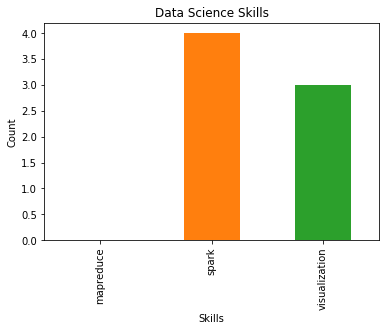

In [23]:
pseries = pd.Series(skill_set)
pseries.sort_values(ascending=False)

pseries.plot(kind = 'bar')
## set the title to Score Comparison
plt.title('Data Science Skills')
## set the x label
plt.xlabel('Skills')
## set the y label
plt.ylabel('Count')
## show the plot
plt.show()

**Question 7**:
- rerun the code to find the counts of the 3 data science skills on the first 200 job ads

190
{'visualization': 2, 'spark': 4, 'mapreduce': 0}
180
{'visualization': 6, 'spark': 5, 'mapreduce': 0}
170
{'visualization': 9, 'spark': 7, 'mapreduce': 0}
HTTPError:
HTTPError:
HTTPError:
HTTPError:
160
{'visualization': 10, 'spark': 9, 'mapreduce': 1}
HTTPError:
HTTPError:
HTTPError:
HTTPError:
150
{'visualization': 11, 'spark': 10, 'mapreduce': 1}
140
{'visualization': 12, 'spark': 14, 'mapreduce': 1}
130
{'visualization': 16, 'spark': 18, 'mapreduce': 3}
HTTPError:
120
{'visualization': 19, 'spark': 21, 'mapreduce': 4}
HTTPError:
HTTPError:
HTTPError:
HTTPError:
HTTPError:
110
{'visualization': 19, 'spark': 21, 'mapreduce': 4}
HTTPError:
HTTPError:
HTTPError:
100
{'visualization': 20, 'spark': 24, 'mapreduce': 5}
HTTPError:
90
{'visualization': 21, 'spark': 25, 'mapreduce': 5}
URLError:
80
{'visualization': 23, 'spark': 27, 'mapreduce': 5}
HTTPError:
70
{'visualization': 27, 'spark': 28, 'mapreduce': 5}
60
{'visualization': 31, 'spark': 34, 'mapreduce': 7}
50
{'visualization': 3

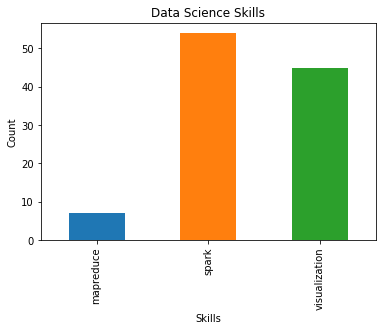

In [25]:
skill_set2 = {'mapreduce':0, 'spark':0, 'visualization':0}
counter = 0
for link in links200:
    counter +=1  
    
    try:
        html_page = urllib2.urlopen(link).read()
    except urllib2.HTTPError:
        print "HTTPError:" 
        continue
    except urllib2.URLError:
        print "URLError:"
        continue
    except socket.error as error:
        print "Connection closed"
        continue

    html_text = re.sub("[^a-z.+3]"," ", html_page.lower()) # replace all but the listed characters
        
    for key in skill_set2.keys():
        if key in html_text:  
            skill_set2[key] +=1
            
    if counter % 10 == 0:
        print len(links200) - counter 
        print skill_set2
            
print
print skill_set2 # Final skill set

pseries = pd.Series(skill_set2)
pseries.sort_values(ascending=False)

pseries.plot(kind = 'bar')
## set the title to Score Comparison
plt.title('Data Science Skills')
## set the x label
plt.xlabel('Skills')
## set the y label
plt.ylabel('Count')
## show the plot
plt.show()

## Lab 4.B: Data analysis of job skills
In the first part of the lab, you created `skill_set` dictionary that counts occurences of 3 important data science skills. In this part of the lab we are asking you to create pandas `DataFrame` object as a table whose rows correspond to individual ads and columns correspond to important information about the ads and skills mentioned on those pages. Let us call the table `job_ads`. Process the first 1,000 data science ads, so your table should have 1,000 rows. For each ad, you will have to create the following columns:
- job title
- company name
- job location
- skill 1
- skill 2
- ...
- skill 20

Job title, company name, and job locations will be readable from the Indeed.com page. We are asking you to list 20 skills, instead of only 3 in the code above ('mapreduce', 'spark', 'visualization'). You will need to find another 17 words that are commonly used in data science job ads. To do it, please explore the content of at least 10 ads.

Once you creat your `job_ads` table, please preform EDA of the table, in a similar way you did in Lab 2: provide code and a 2-page document that summarizes interesitng insights about the first 1,000 data science jobs.

**Deliverables**:
- the modified Lab 4 .ipynb file that contains all the answers to the questions
- a 2-page documents presenting the results of your EDA of the `job_ads` data

**THE FOLLOWING IS CODE TO GENERATE DATAFRAME AS WELL AS CODE TO PRODUCE MEANINGFUL GRAPHS**

In [3]:
# Dataframe of 1000 with title, company, loc and 20 skills
job_ads = pd.DataFrame()
base_url2 = "http://www.indeed.com"
linkcounter=0
for i in range(135): #Since an average of 10 jobs appear on a page 135 should be more than enough pages
    
    url = 'http://www.indeed.com/jobs?q=data+scientist&start=' + str(i*10)
    html_page = urllib2.urlopen(url).read() 
    bs_tree = bs4.BeautifulSoup(html_page)
    job_link_area = bs_tree.find(id = 'resultsCol') 
    job_postings = job_link_area.findAll("div", {'class': ' row result'})
    
    for jp in job_postings:
        if(linkcounter==1000): # break out of nested loop
            break
        else:
            company= jp.find('span',{"class":"company"}).getText().strip()
            location = jp.find('span',{"class":"location"}).getText().strip()
            title =jp.find('a', attrs={'class': 'turnstileLink'}).attrs['title']
            link2 = "%s%s" % (base_url2, jp.find('a').get('href'))
            entry={'Title': title, 'Company': company, 'Location': location, 
                      'mapreduce':0, 'spark':0, 'visualization':0,
                      'hadoop':0, 'machine learning':0, 'python':0, 'aws':0,
                      'sas':0, 'spss':0, 'tableau':0, 'scala':0,'r':0, 
                      'matlab':0, 'azure':0, 'java':0,'hive':0, 
                      'excel':0, 'sql':0, 'octave':0,'julia':0,}
            try:
                link_page = urllib2.urlopen(link2).read()
            except urllib2.HTTPError:
                #print "HTTPError:"
                continue
            except urllib2.URLError:
                #print "URLError:"
                continue
            except socket.error as error:
               # print "Connection closed"
                continue
            linkcounter +=1 # increment counter as no failure in opening page
            link_text = re.sub("[^a-z.+3]"," ", link_page.lower())
            for key in entry.keys():
                if key =="Title" or key == "Company" or key == "Location":
                    continue
                if key in link_text:  
                    entry[key] +=1
            job_ads=job_ads.append(entry, ignore_index=True)
    if (linkcounter==1000): #break out of main loop
        break
job_ads.shape

(1000, 23)

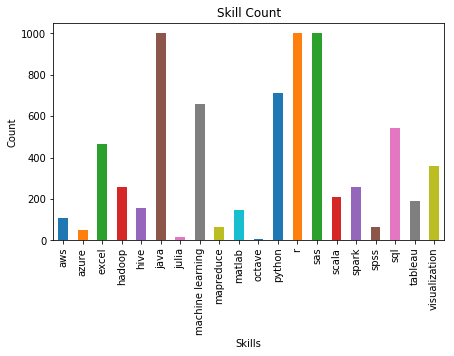

In [112]:
#Number of times each skill word appears for 1000 jobs
df=job_ads;
skills={              'mapreduce':df['mapreduce'].sum(), 'spark':df['spark'].sum(), 'visualization':df['visualization'].sum(),
                      'hadoop':df['hadoop'].sum(), 'machine learning':df['machine learning'].sum(),
                      'python':df['python'].sum(), 'aws':df['aws'].sum(),
                      'sas':df['sas'].sum(), 'spss':df['spss'].sum(), 'tableau':df['tableau'].sum(),
                      'scala':df['scala'].sum(),'r':df['r'].sum(), 
                      'matlab':df['matlab'].sum(), 'azure':df['azure'].sum(), 'java':df['java'].sum(),
                      'hive':df['hive'].sum(), 
                      'excel':df['excel'].sum(), 'sql':df['sql'].sum(), 'octave':df['octave'].sum(),
                      'julia':df['julia'].sum(),}

sd=pd.Series(skills)
plt.figure(figsize=(7,4))
sd.plot(kind='bar')

plt.title("Skill Count");
plt.xlabel("Skills");
plt.ylabel("Count");


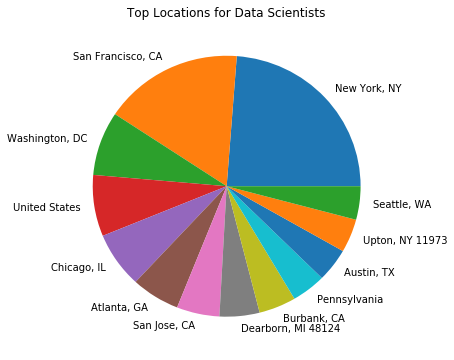

In [86]:
#Top Locations for Data Scientists
js=df['Location'].value_counts()
js=js[js.values>=12];
plt.title("Top Locations for Data Scientists")
bp=js.plot(kind="pie",figsize=(6,6));
bp.get_figure().gca().set_ylabel("");

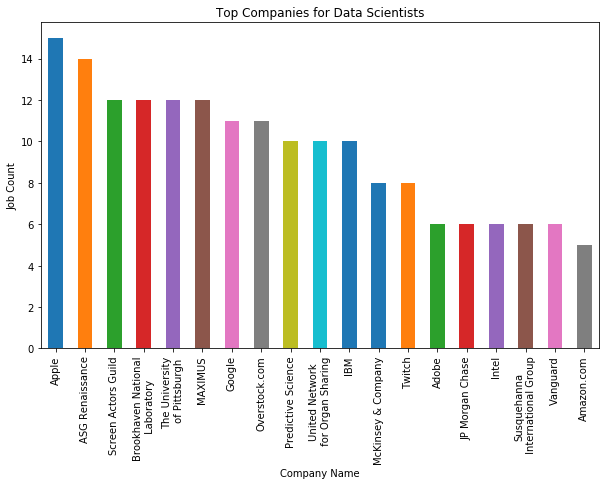

In [113]:
#Top Companis for Data Scientists
com=df['Company'].value_counts()
com=com[com.values>=5];
xticks=["Apple","ASG Renaissance","Screen Actors Guild","Brookhaven National\n Laboratory","The University\n of Pittsburgh",
        "MAXIMUS", "Google","Overstock.com","Predictive Science","United Network\n for Organ Sharing","IBM","McKinsey & Company",
       "Twitch","Adobe","JP Morgan Chase","Intel","Susquehanna\n International Group","Vanguard","Amazon.com"]
plt.title("Top Companies for Data Scientists")
com.plot(kind="bar",figsize=(10,6));
ind=range(19)
plt.xticks(ind,xticks)
plt.xlabel("Company Name");
plt.ylabel("Job Count");

